
## Transect plots

Plot transects through your dataset. Transects are vertical slices along some path through your dataset.

The following is a transect path starting in the Great Sandy Strait near K’gari, heading roughly North out to deeper waters:


We have borrowed the example heavily from the emsarray notebooks. However, we show below how to perform a transact using the GBR4 data.

In [1]:
import emsarray as ems
import shapely
from emsarray import plot, transect
from matplotlib import pyplot

dataset = "https://dapds00.nci.org.au/thredds/dodsC/fx3/model_data/gbr4_2.0.ncml"

dataset = ems.open_dataset(dataset).isel(time=-1)
dataset = dataset.ems.select_variables(['botz', 'temp'])

line = shapely.LineString([
    [152.8417969, -24.8764699],
    [152.5231934, -24.4571505],
    [152.0507813, -23.9360549],
    [151.4135742, -23.4430889],
    [151.2597656, -22.8673180],
    [150.8972168, -22.1365316],
    [149.9853516, -21.6982655],
    [149.5129395, -20.6841838],
])
landmarks = [
    ("Lady Elliot Island", shapely.Point(152.7145958, -24.1129146)),
    ("Percy Isles National Park", shapely.Point(150.2984619, -21.6982655)),
    ("Keswick Island", shapely.Point(149.4059944, -20.9101345)),
]



We can visualise the transect path:


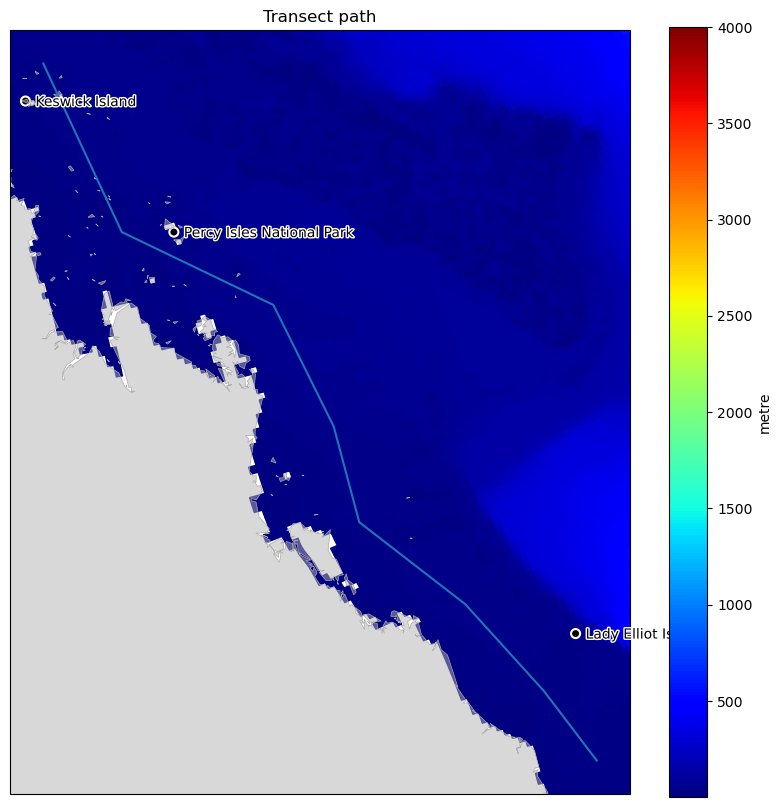

In [2]:


figure = pyplot.figure(figsize=(10, 10))
dataset.ems.plot_on_figure(
    figure, 'botz', title="Transect path",
    landmarks=landmarks, gridlines=False)

axes = figure.axes[0]
axes.set_aspect('equal', 'box')
axes.set_extent(plot.bounds_to_extent(line.envelope.buffer(0.2).bounds))
axes.plot(*line.coords.xy)

pyplot.show()





A transect showing the water temperature along this plot:


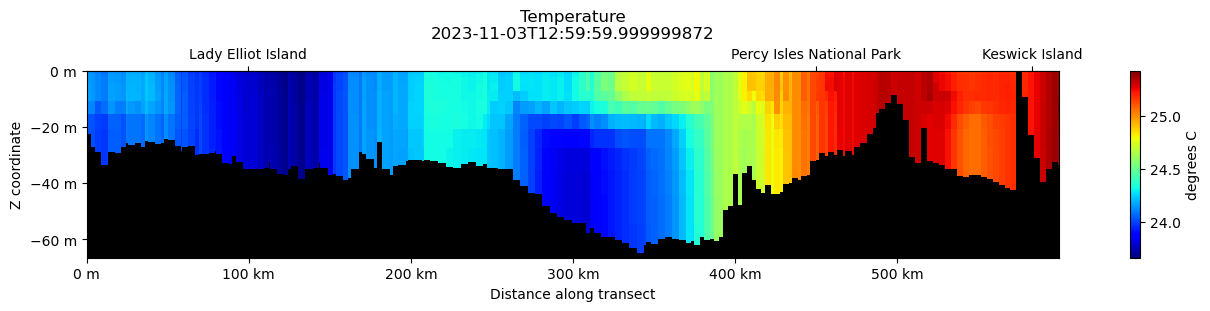

In [3]:
figure = transect.plot(
    dataset, line, dataset["temp"],
    landmarks=landmarks,
    bathymetry=dataset["botz"])